# Iris dataset

### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from mpl_toolkits import mplot3d
from sklearn.inspection import DecisionBoundaryDisplay 
#from https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html

### Loading data

In [47]:
data = datasets.load_iris()

feature_values = data.data
labels = data.target
print(data.target)
classes = data.target_names
features = data.feature_names
sestosas, versicolors, virginicas = np.array([feature_values[0]]),np.array([feature_values[0]]),np.array([feature_values[0]])
for i in range(len(labels)):
    iris_values = feature_values[i]
    if labels[i] == 0: 
        versicolors = np.append(versicolors,[iris_values],axis=0)
    elif labels[i] == 1:
        sestosas = np.append(sestosas,[iris_values],axis=0)
    else:
        virginicas = np.append(virginicas,[iris_values],axis=0)

sestosas = sestosas[1:]
versicolors = versicolors[1:]
virginicas = virginicas[1:]
# The data given in the dataset is categorized into three numpy arrays, one for each class.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
print(f"Classes: >{classes[0]} >{classes[1]} >{classes[2]}")
print(f"Features: >{features[0]} >{features[1]} >{features[2]} >{features[3]}")

Classes: >setosa >versicolor >virginica
Features: >sepal length (cm) >sepal width (cm) >petal length (cm) >petal width (cm)


### Feature Combinations

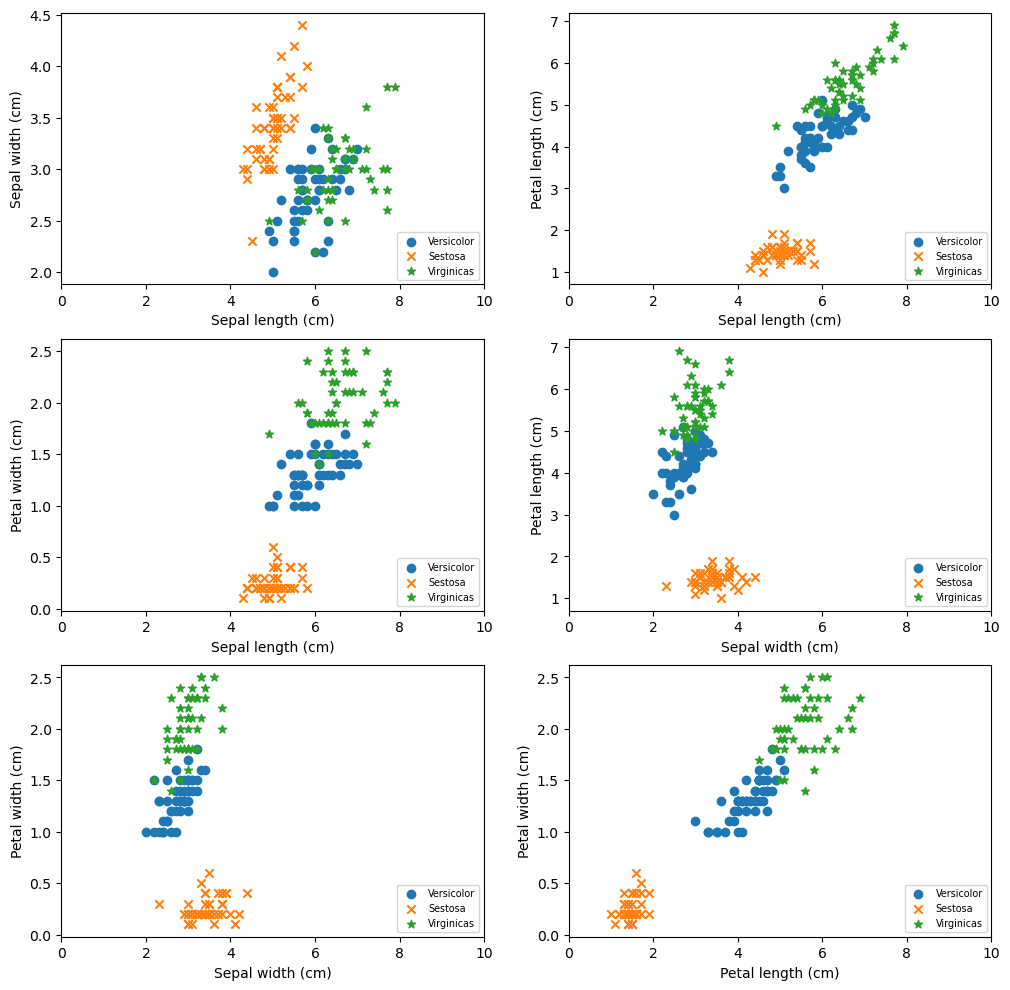

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

k,k1,k2 = 0,0,0
for i in range(4):
    for j in range(i+1,4):
        k1,k2 = int(k/2),np.mod(k,2) 
        ax[k1,k2].scatter(sestosas[:,i],sestosas[:,j], label = "Versicolor")
        ax[k1,k2].scatter(versicolors[:,i],versicolors[:,j], label = "Sestosa", marker = "x")
        ax[k1,k2].scatter(virginicas[:,i],virginicas[:,j], label = "Virginicas", marker="*")
        ax[k1,k2].legend(loc="lower right", fontsize='x-small')
        ax[k1,k2].set_xlim(0,10)
        ax[k1,k2].set_xlabel(f"{features[i].capitalize()}")
        ax[k1,k2].set_ylabel(f"{features[j].capitalize()}")
        k += 1
plt.show()

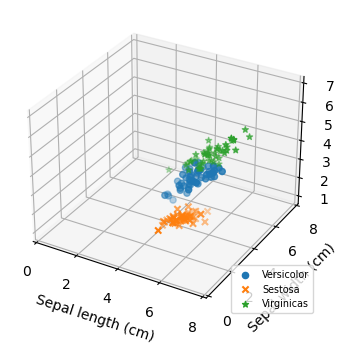

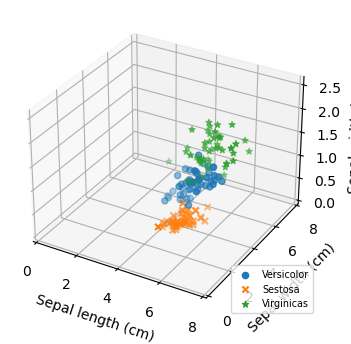

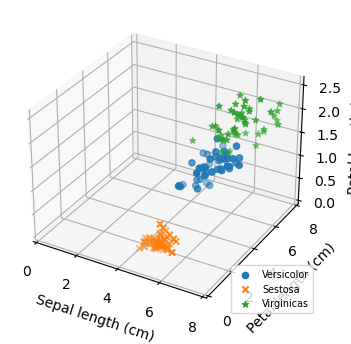

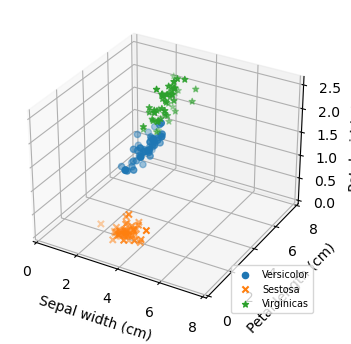

In [5]:
k,k1,k2 = 0,0,0
for i in range(4):
    for j in range(i+1,4):
        for p in range(j+1,4):
            fig = plt.figure(figsize=(4,4))
            ax = plt.axes(projection='3d')
            ax.scatter3D(sestosas[:,i],sestosas[:,j],sestosas[:,p], label = "Versicolor")
            ax.scatter3D(versicolors[:,i],versicolors[:,j],versicolors[:,p], label = "Sestosa", marker = "x")
            ax.scatter3D(virginicas[:,i],virginicas[:,j],virginicas[:,p], label = "Virginicas", marker = "*")
            
            ax.legend(loc="lower right", fontsize='x-small')
            ax.set_xlim(0,8)
            ax.set_ylim(0,8)
            ax.set_xlabel(f"{features[i].capitalize()}")
            ax.set_ylabel(f"{features[j].capitalize()}")
            ax.set_zlabel(f"{features[k].capitalize()}")
            k += 1
plt.show()

### Loss Functions

The average of each loss function for each feature combination will be stored in an array to plot later.
The loss functions used will be Perceptron, Hinge, Log, and Modified Huber.

In [6]:
perceptron_avg = [0]
hinge_avg = [0]
log_avg = [0]
modhub_avg = [0]

## Feature combinations

The SGD classifier models from Sklearn will be used to fit the data and build a model capable of predicting the rigth classes.  

### A(Sepal Length)

In [7]:
perceptron_total,hinge_total,log_total,modhub_total = 0,0,0,0

#### Perceptron

In [45]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='perceptron')

XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
### XX is the data of all three classes with all he feature values included.

row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
### YY stores the right results as 0,1,2 at the appropriate index
    
XX = np.delete(XX,[1,2,3],axis=1)
### Numpy deletes the columns (unused feature values) of the classes

A = clf.fit(XX,YY)
### The data is fit into the model

perceptron_total += clf.score(XX,YY)*100
#### The score is stored in the total for 1 class combinations

print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.4 2.9 4.3 1.3]
 [6.6 3.  4.4 1.4]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [6.  2.9 4.5 1.5]
 [5.7 2.6 3.5 1. ]
 [5.5 2.4 3.8 1.1]
 [5.5 2.4 3.7 1. ]
 [5.8 2.7 3.9 1.2]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [6.3 2.3 4.4 1.3]
 [5.6 3.  4.1 1.3]
 [5.5 2.5 4.  1.3]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [5.8 2.6 4.  1.2]
 [5.  2.3 3.3 1. ]
 [5.6 2.7 4.2 1.3]
 [5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]
 [5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.

#### Hinge

In [9]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,2,3],axis=1)
A = clf.fit(XX,YY)
hinge_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.5

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     1
n_iter_            54


#### Log

In [10]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='log_loss')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,2,3],axis=1)
A = clf.fit(XX,YY)
log_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.44

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     1
n_iter_            73


#### Modified Huber

In [11]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,2,3],axis=1)
A = clf.fit(XX,YY)
modhub_total += clf.score(XX,YY)*100

print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.6466666666666666

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     1
n_iter_            68


### B (Sepal Width)

#### Perceptron

In [12]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='perceptron')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[0,2,3],axis=1)
A = clf.fit(XX,YY)
perceptron_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.54

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     1
n_iter_            45


#### Hinge

In [13]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[0,2,3],axis=1)
A = clf.fit(XX,YY)
hinge_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.5533333333333333

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     1
n_iter_            64


#### Log

In [14]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='log_loss')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[0,2,3],axis=1)
A = clf.fit(XX,YY)
log_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.56

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     1
n_iter_            48


#### Modified Huber

In [15]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[0,2,3],axis=1)
A = clf.fit(XX,YY)
modhub_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.5333333333333333

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     1
n_iter_            38


In [16]:
perceptron_avg.append(perceptron_total/2)
modhub_avg.append(modhub_total/2)
log_avg.append(log_total/2)
hinge_avg.append(hinge_total/2)

### AB (Sepal Length and Sepal Width)

#### Perceptron


Score:  0.68

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            61


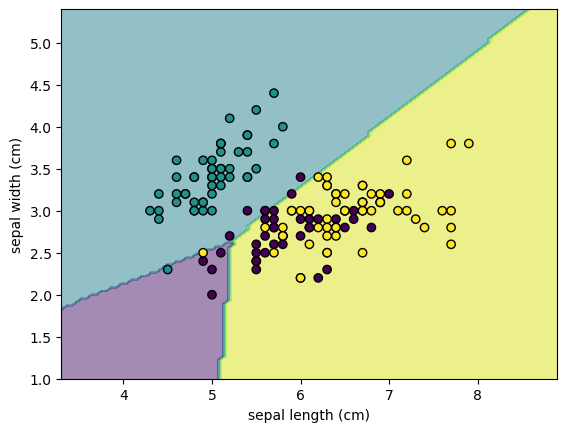

In [17]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='perceptron')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[2,3],axis=1)
A = clf.fit(XX,YY)

disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[1]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
### We are going to use the DesicionBoundaryDisplay to plot the desicion boundary created by the model after the data is fit
### The data is the plotted on the same graph

perceptron_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Hinge


Score:  0.7133333333333334

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            64


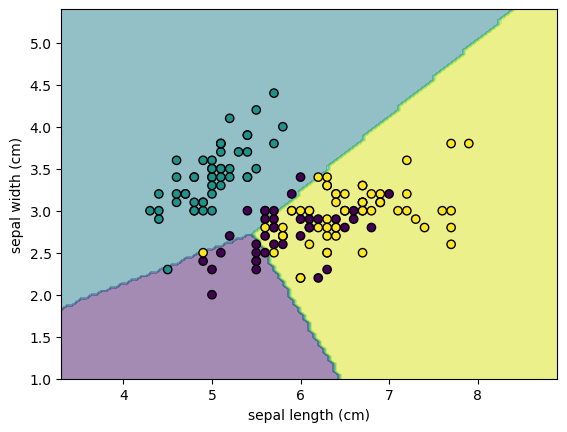

In [18]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[2,3],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[1]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
hinge_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Log


Score:  0.7

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            47


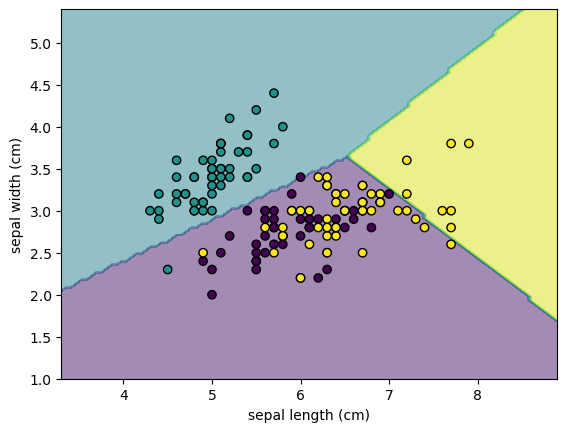

In [19]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='log_loss')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[2,3],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[1]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
log_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Modified Huber 


Score:  0.6666666666666666

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            39


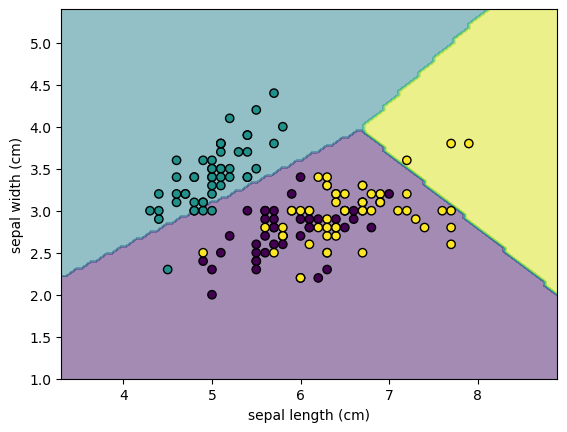

In [20]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[2,3],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[1]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
modhub_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

### AC (Sepal Length and Petal Length) 

#### Perceptron 


Score:  0.6066666666666667

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            36


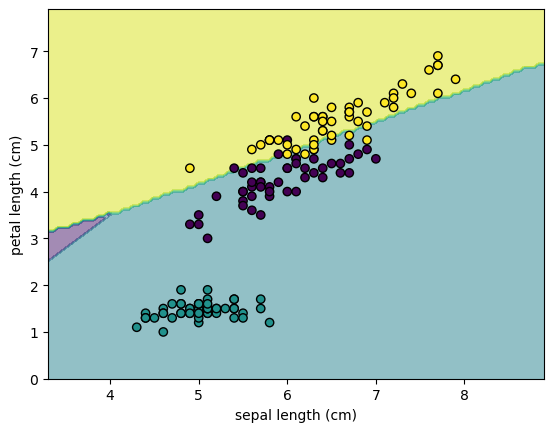

In [21]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='perceptron')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,3],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[2]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
perceptron_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


#### Hinge 


Score:  0.5933333333333334

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            36


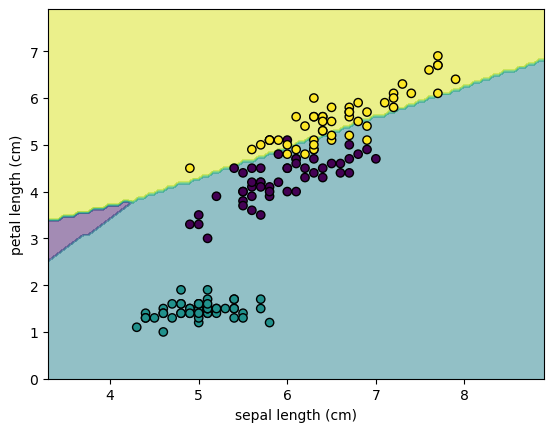

In [22]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,3],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[2]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
hinge_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Log


Score:  0.6666666666666666

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2 :
n_iter_            36


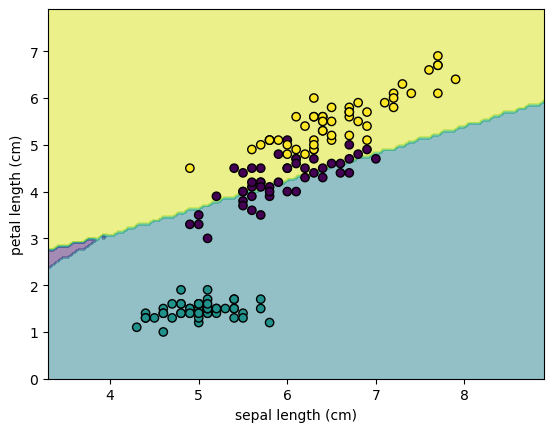

In [23]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='log_loss')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,3],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[2]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
log_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_,":")
print ('n_iter_           ',A.n_iter_ )

#### Modified Huber


Score:  0.5533333333333333

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            36


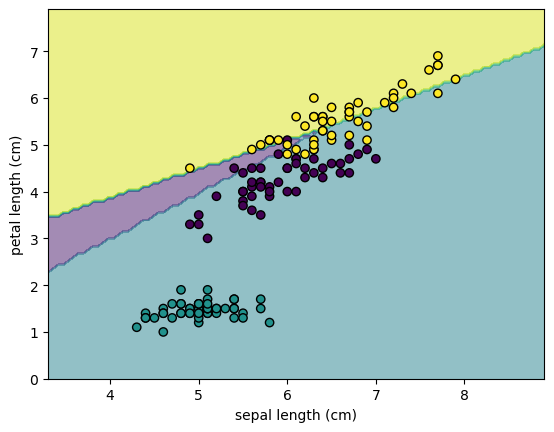

In [24]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,3],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[2]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
modhub_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

### AD (Sepal Length and Petal Length) 

#### Perceptron


Score:  0.6666666666666666

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            36


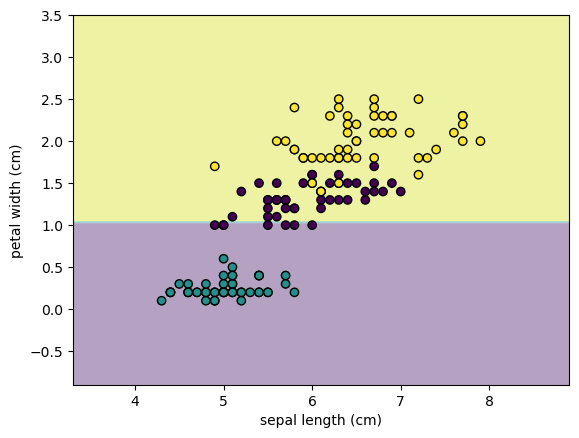

In [25]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='perceptron')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,2],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.4,xlabel=features[0],ylabel=features[3]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
perceptron_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Hinge 


Score:  0.7133333333333334

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            36


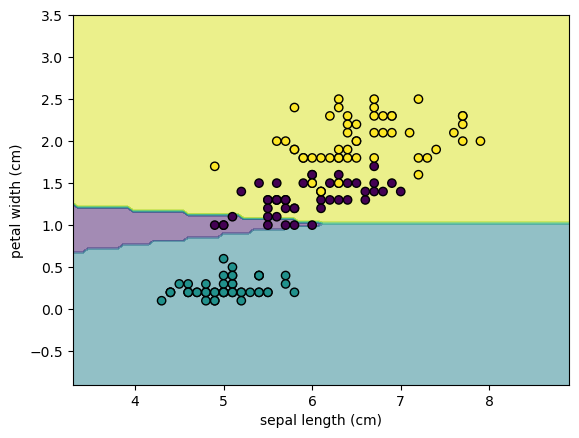

In [26]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,2],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[3]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
hinge_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Log


Score:  0.8266666666666667

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            36


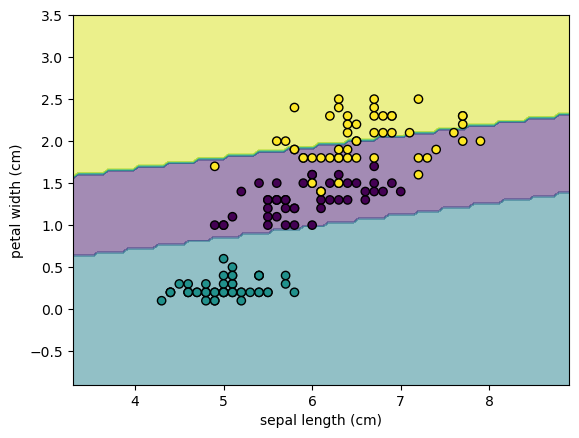

In [27]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='log_loss')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,2],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[3]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
log_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Modified Huber 


Score:  0.5466666666666666

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     2
n_iter_            36


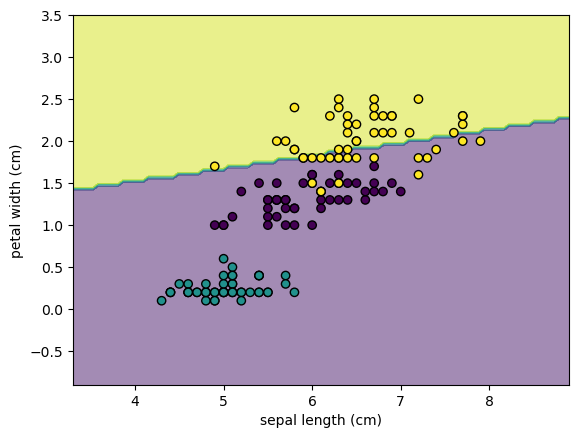

In [28]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,[1,2],axis=1)
A = clf.fit(XX,YY)
disp = DecisionBoundaryDisplay.from_estimator(
     A, XX, response_method="predict",
     alpha=0.5,xlabel=features[0],ylabel=features[3]
)
disp.ax_.scatter(XX[:, 0], XX[:, 1], c=data.target, edgecolor="k")
modhub_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

In [29]:
perceptron_avg.append(perceptron_total/3)
modhub_avg.append(modhub_total/3)
log_avg.append(log_total/3)
hinge_avg.append(hinge_total/3)

### ABC (Sepal Length and Sepal Width and Petal Length) 

#### Perceptron


Score:  0.6533333333333333

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     3
n_iter_            42


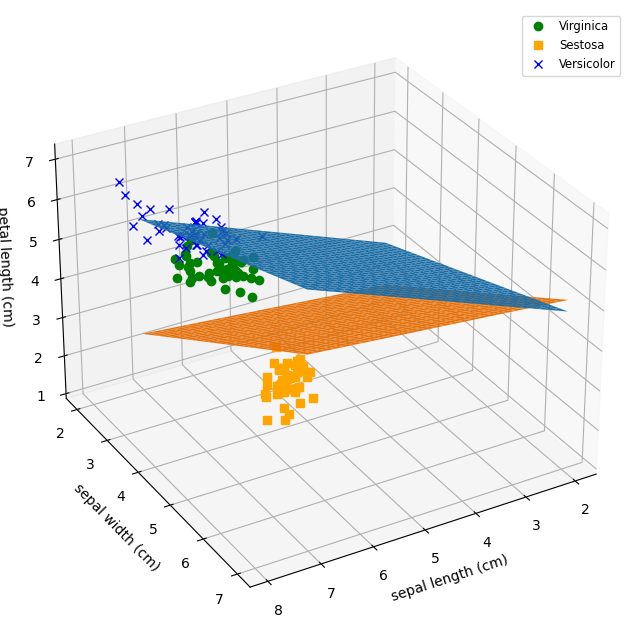

In [30]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='perceptron')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,3,axis=1)
A = clf.fit(XX,YY)

### The 3D decision boundary created by the model can be plot using the coefficient and intercepts given by the model:
### -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z2 = lambda x,y: -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z3 = lambda x,y: -(A.coef_[2,0]*x+A.coef_[2,1]*y+A.intercept_[2])/A.coef_[2,2]
tmp = np.linspace(2,7,30)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],"og",label="Virginica")
ax.plot3D(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2],"s",color="orange",label="Sestosa")
ax.plot3D(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],"xb",label="Versicolor")
### We can plot the data on the graph using plot3D

ax.plot_surface(x, y, z3(x,y))
ax.plot_surface(x, y, z2(x,y))
ax.legend(loc='upper right', fontsize='small')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])    
ax.view_init(30, 60)

perceptron_total = clf.score(XX,YY)*100

print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Hinge


Score:  0.74

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     3
n_iter_            53


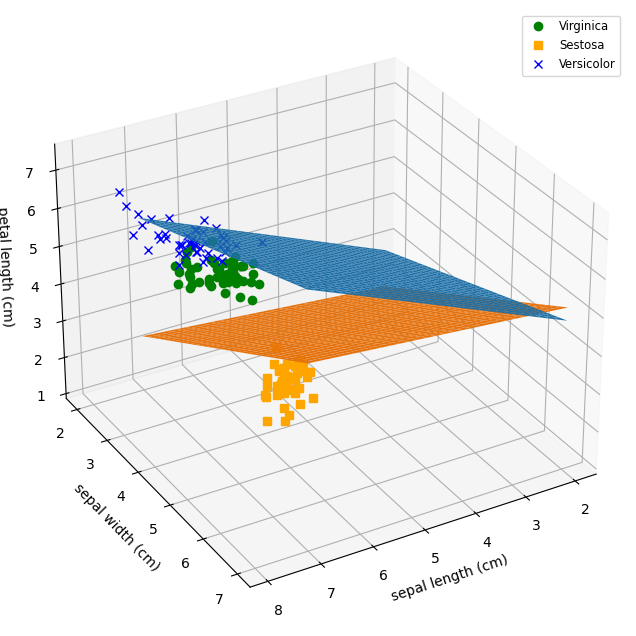

In [31]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,3,axis=1)
A = clf.fit(XX,YY)
z1 = lambda x,y: -(A.coef_[0,0]*x+A.coef_[0,1]*y+A.intercept_[0])/A.coef_[0,2]
z2 = lambda x,y: -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z3 = lambda x,y: -(A.coef_[2,0]*x+A.coef_[2,1]*y+A.intercept_[2])/A.coef_[2,2]
tmp = np.linspace(2,7,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],"og",label="Virginica")
ax.plot3D(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2],"s",color="orange",label="Sestosa")
ax.plot3D(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],"xb",label="Versicolor")
ax.plot_surface(x, y, z3(x,y))
ax.plot_surface(x, y, z2(x,y))
ax.legend(loc='upper right', fontsize='small')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])    
ax.view_init(30, 60)
hinge_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Log


Score:  0.6933333333333334

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     3
n_iter_            47


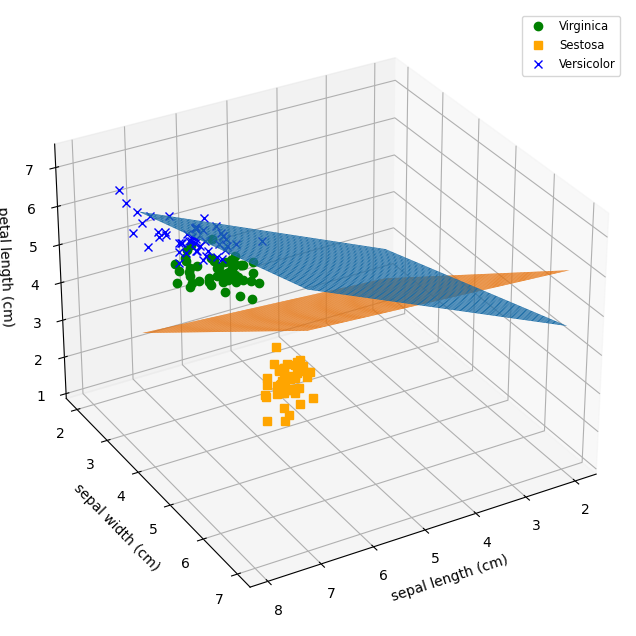

In [32]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='log_loss')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,3,axis=1)
A = clf.fit(XX,YY)
z2 = lambda x,y: -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z3 = lambda x,y: -(A.coef_[2,0]*x+A.coef_[2,1]*y+A.intercept_[2])/A.coef_[2,2]
tmp = np.linspace(2,7,50)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],"og",label="Virginica")
ax.plot3D(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2],"s",color="orange",label="Sestosa")
ax.plot3D(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],"xb",label="Versicolor")
ax.plot_surface(x, y, z3(x,y))
ax.plot_surface(x, y, z2(x,y))
ax.legend(loc='upper right', fontsize='small')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])    
ax.view_init(30, 60)
log_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Modified Huber


Score:  0.6733333333333333

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     3
n_iter_            51


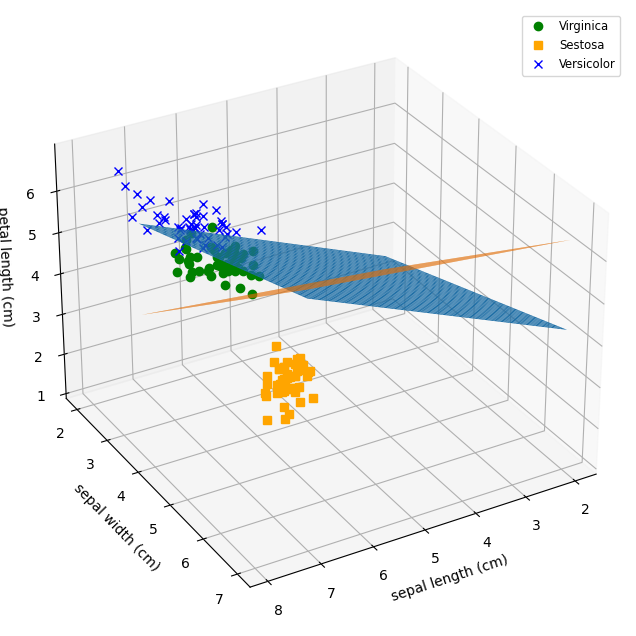

In [33]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,3,axis=1)
A = clf.fit(XX,YY)
z2 = lambda x,y: -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z3 = lambda x,y: -(A.coef_[2,0]*x+A.coef_[2,1]*y+A.intercept_[2])/A.coef_[2,2]
tmp = np.linspace(2,7,50)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],"og",label="Virginica")
ax.plot3D(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2],"s",color="orange",label="Sestosa")
ax.plot3D(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],"xb",label="Versicolor")
ax.plot_surface(x, y, z3(x,y))
ax.plot_surface(x, y, z2(x,y))
ax.legend(loc='upper right', fontsize='small')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])    
ax.view_init(30, 60)
modhub_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

### ABD (Sepal Length and Sepal Width and Petal Width) 

#### Perceptron


Score:  0.6666666666666666

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     3
n_iter_            68


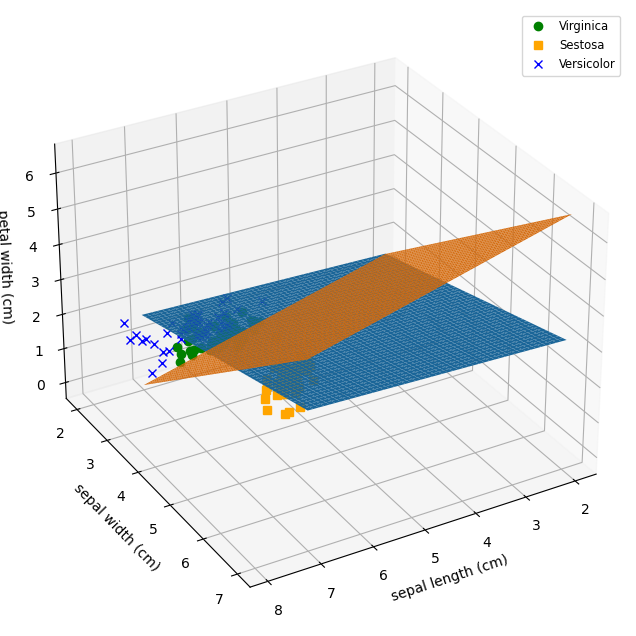

In [34]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='perceptron')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,2,axis=1)
A = clf.fit(XX,YY)
z2 = lambda x,y: -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z3 = lambda x,y: -(A.coef_[2,0]*x+A.coef_[2,1]*y+A.intercept_[2])/A.coef_[2,2]
tmp = np.linspace(2,7,50)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],"og",label="Virginica")
ax.plot3D(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2],"s",color="orange",label="Sestosa")
ax.plot3D(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],"xb",label="Versicolor")
ax.plot_surface(x, y, z3(x,y))
ax.plot_surface(x, y, z2(x,y))
ax.legend(loc='upper right', fontsize='small')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[3])    
ax.view_init(30, 60)
perceptron_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Hinge


Score:  0.68

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     3
n_iter_            61


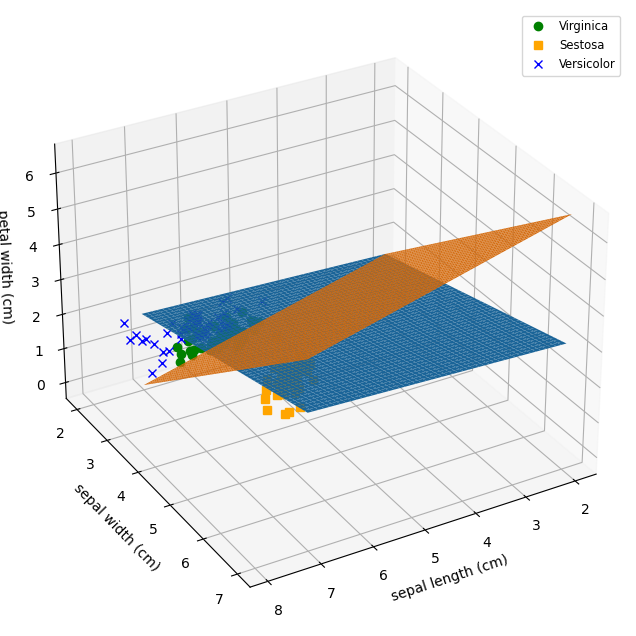

In [35]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,2,axis=1)
A = clf.fit(XX,YY)
z2 = lambda x,y: -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z3 = lambda x,y: -(A.coef_[2,0]*x+A.coef_[2,1]*y+A.intercept_[2])/A.coef_[2,2]
tmp = np.linspace(2,7,50)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],"og",label="Virginica")
ax.plot3D(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2],"s",color="orange",label="Sestosa")
ax.plot3D(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],"xb",label="Versicolor")
ax.plot_surface(x, y, z3(x,y))
ax.plot_surface(x, y, z2(x,y))
ax.legend(loc='upper right', fontsize='small')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[3])    
ax.view_init(30, 60)
hinge_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Log


Score:  0.76

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     3
n_iter_            70


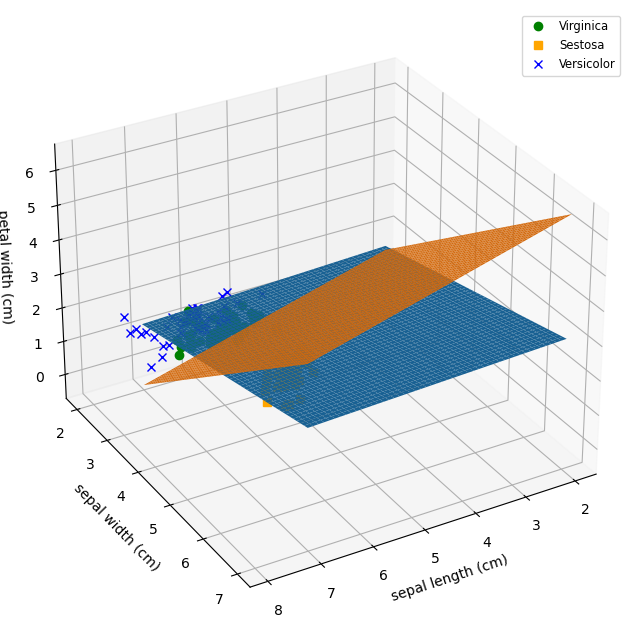

In [36]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='log_loss')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,2,axis=1)
A = clf.fit(XX,YY)
z2 = lambda x,y: -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z3 = lambda x,y: -(A.coef_[2,0]*x+A.coef_[2,1]*y+A.intercept_[2])/A.coef_[2,2]
tmp = np.linspace(2,7,50)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],"og",label="Virginica")
ax.plot3D(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2],"s",color="orange",label="Sestosa")
ax.plot3D(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],"xb",label="Versicolor")
ax.plot_surface(x, y, z3(x,y))
ax.plot_surface(x, y, z2(x,y))
ax.legend(loc='upper right', fontsize='small')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[3])    
ax.view_init(30, 60)
log_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

#### Modified Huber


Score:  0.7466666666666667

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     3
n_iter_            56


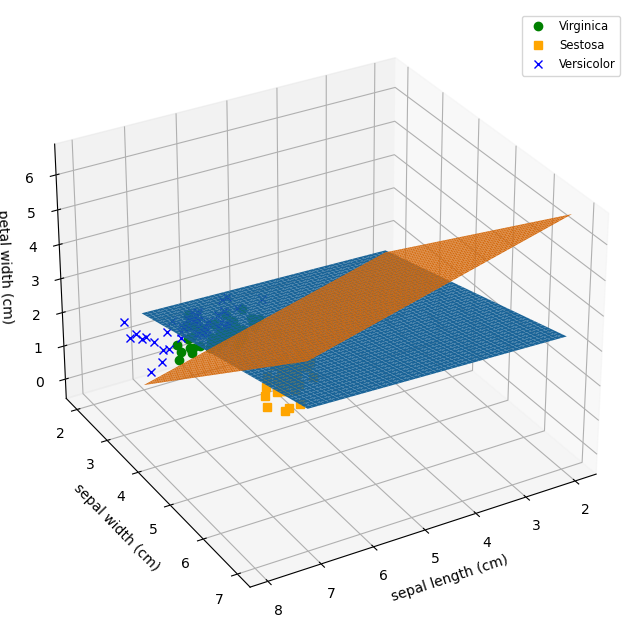

In [37]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
XX = np.delete(XX,2,axis=1)
A = clf.fit(XX,YY)
z2 = lambda x,y: -(A.coef_[1,0]*x+A.coef_[1,1]*y+A.intercept_[1])/A.coef_[1,2]
z3 = lambda x,y: -(A.coef_[2,0]*x+A.coef_[2,1]*y+A.intercept_[2])/A.coef_[2,2]
tmp = np.linspace(2,7,50)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],"og",label="Virginica")
ax.plot3D(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2],"s",color="orange",label="Sestosa")
ax.plot3D(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],"xb",label="Versicolor")
ax.plot_surface(x, y, z3(x,y))
ax.plot_surface(x, y, z2(x,y))
ax.legend(loc='upper right', fontsize='small')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[3])    
ax.view_init(30, 60)
modhub_total += clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )

In [38]:
perceptron_avg.append(perceptron_total/2)
modhub_avg.append(modhub_total/2)
log_avg.append(log_total/2)
hinge_avg.append(hinge_total/2)

### ABCD (Sepal Length and Sepal Width and Petal Length and Petal Width) 

#### Perceptron

In [39]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='perceptron')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
    
### No change is made on the XX data since all features are taken
A = clf.fit(XX,YY)
perceptron_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.6333333333333333

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            36


#### Hinge

In [40]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
A = clf.fit(XX,YY)
hinge_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.72

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            36


#### Log

In [41]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='log_loss')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
A = clf.fit(XX,YY)
log_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.9466666666666667

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            47


#### Modified Huber

In [42]:
clf = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)
A = clf.fit(XX,YY)
modhub_total = clf.score(XX,YY)*100
print('\nScore: ',clf.score(XX,YY))
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.8066666666666666

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            47


In [43]:
perceptron_avg.append(perceptron_total)
modhub_avg.append(modhub_total)
log_avg.append(log_total)
hinge_avg.append(hinge_total)

### Results 

Text(0.5, 1.0, 'Loss Functions (Accuracy vs. Features)')

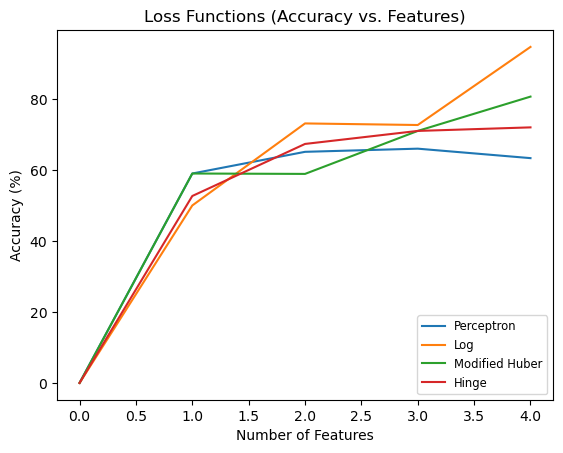

In [44]:
plt.plot(perceptron_avg,label="Perceptron")
plt.plot(log_avg,label="Log")
plt.plot(modhub_avg,label="Modified Huber")
plt.plot(hinge_avg,label="Hinge")
plt.legend(loc='lower right', fontsize='small')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy (%)")
plt.title("Loss Functions (Accuracy vs. Features)")

##### The classes tested were: Virginica, Sestosa and Versicolor.
##### The features tested were: A = Sepal Length, B = Sepal Width, C = Petal Length and D = Petal Width.
##### The feature combinations tested were: A, B, AB, AC, AD, ABC, ABD, and ABCD.
- The results of the SGD classifier shown above from the Sklearn library allow us to understand the effect of loss functions and the number of features in the model. 
- The results are obtained from an average of accuracy given in the number of features in general, i.e.the average of AB, AC, and AD will count as one input in the graph.
- Altough the accuracy is near the same with the 1 feature implementation, the difference grows as we increase the number of features
- As the number of feature increases the models, such as log and modified huber, benefit from the information an incrementally improve its accuracy.
- The log loss and modified huber functions outperforms the other loss functions wtih near perfect accuracy on the model with the log loss function being the closest to 100%.
